<a href="https://colab.research.google.com/github/athan37/Multilayer-Perceptron-From-Scratch/blob/main/Duc_Anh_Multilayer_Network_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this tutorial, we will expand on the idea of a single neural network, in which we will stack multiple neurons on each other to solve more complicated problems. Before, with a single perceptron, we can only tackle linear separable problems, however, in this tutorial, we will deal with non-linearity problems by adding more layers of neuron.

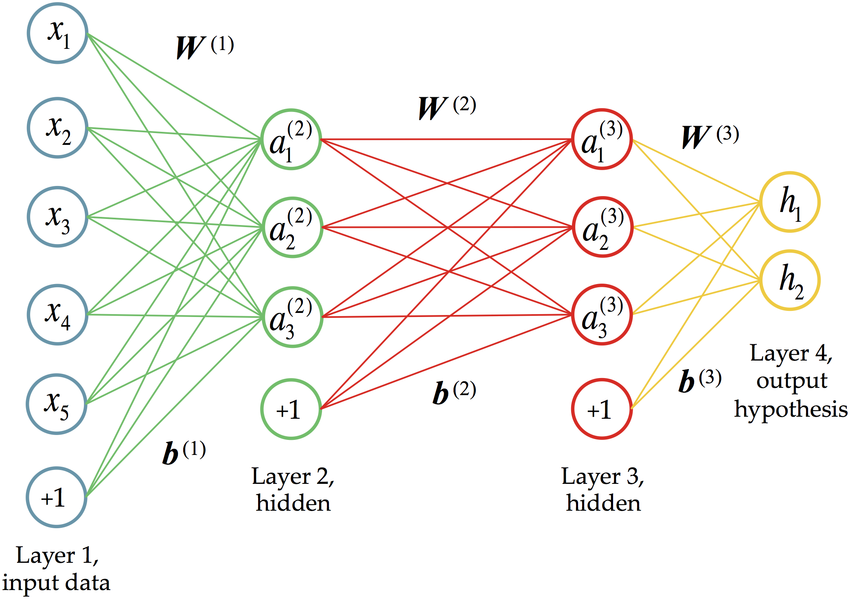

Image from Sheehan, Sara & Song, Yun. (2016). Deep Learning for Population Genetic Inference. PLOS Computational Biology. 12. e1004845. 10.1371/journal.pcbi.1004845. 

**Activation function**

We will use the same sigmoid function as the previous tutorial, but we also add the sigmoid prime function, which will be used later in backpropagation.

In [ ]:
import numpy as np

def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

def sigmoidPrime(a):
  return sigmoid(a) * (1-sigmoid(a))

**Non-linearity and hidden layers**

The fancy name hidden layers comes from the number of neuron layers we add to the network, which resides between the input layer and output layer. The more hidden layers we add, the more non-linearity we can learn. Simply adding many hidden layers will slow the network and may not yield better results. In fact, we prefer less hidden layers are preferred because more hidden layers will increase the chance of **over-fitting**, meaning we achieve more accuracy on the training set but we perform worse on the test set.

**Structure of a multilayer network**

The nice thing about hidden layers is that we don't need to care about the dimension of the hidden layers' weights and biases when using it. As more layers are added to our network, we have to keep track of all hidden layer's weights and biases starting from the first hidden layer to the output layer. We can use an array to store them so that we don't need to manually type all of them out when updating.
 
For example, in the MNIST dataset, we have 60000 x 28 x 28 data, we then flatten the image and get a 60000 x 784 array. The output we want is 60000 x 10. We only need to take care of the number of input features 784, and the number of output 10 corresponding to digits from 0-9.
 
The weights and biases depend on the dimension of the input layer and the output layer. If we only have 1 hidden layer, we then have 2 sets of weights, one is for the hidden layer itself, one is for the output. In the MNIST dataset, we input 784 features and we want to get 10 outputs, so the weight for the hidden layer will have the shape (784, k) and the weight for the output layers will be (k, 10), where k is the number of nodes that you can choose when creating the network. Similarly, the hidden bias will be a vector with length k, and the output bias will be a vector with length 10.
 
Notes: if we want to add more layer, such as adding another hidden layer between between (784, k) and (k, 10), there will be 3 weights with the dimensions (784, k) (k, v) and (v, 10), where k, v are constants that you can choose yourself. The process is the same with more hidden layers.


**Implementation of the multilayer network in python**

In this tutorial, we use a class to create our nerual network so we can easily store and use the data inside our functions. \\
A class consists of class fields and functions. For example, if we have a class Student, it may contain some fields such as name, age, ... and functions such as study(), sleep(), ... Here, we call "function" as "method", because it's inside a class. Each method will have the signature:

```
def method_name(self, #Parameters): 
  pass 
```

A basic Python class will look like this:

```
class Class_name:
  #Also called "constructor"
  def __init__(self, field_1, field_2, ... #parameter):
    '''Must be present inorder to create the class'''
    self.field_1 = field_1
    self.field_1 = field_2
    ...

    pass

  def method_1(self, #Parameters): 
    pass 

  def method_2(self, #Parameters): 
    pass 

  ...
```

Now, we will write a class to represent our multilayer network. Inside it we will first initialize all weights and biases according to the given number nodes in the input, hidden and output layers.
 
Because this is a multilayer network, we need to raise the error when the network has less than 3 layers.

```
class NeuralNetwork:
  def __init__(self, X, y, structure):
    """
      Initialize the network with X, y and structure tuple. The network will
      itself figure out the dimension for weights and biases of all hidden
      layers.

      It will throw an error when the structure has less than 3 layers.

      -----
      Params:
        X: np.array
          The train data

        y: np.array
          The test data

        structure: tuple (or array)
          Num nodes in input layer, num node in all hidden layers, and num nodes
          in output layer.

          Ex: A network like this
            Input (784) -> Hidden(64) -> Hidden1(32) -> Output(10)
          The structure for it is: (784, 64, 32, 10)

    """

    if len(structure) < 3: raise ValueError("Invalid structure")

    self.X = X
    self.y = y
    self.structure = structure
    self.weights, self.biases = self.initialize_network()

```
We will create weights and biases for each layer to initialize the network. For instance, if the network structure is 784 - 64 - 32 - 10, the input layer has 784 nodes, the hidden layer has 64 nodes and the hidden layer 1 has 32 nodes, the output layer has 10 nodes. It can be implemented manually as follow:

```
# Define network structure
numInputs  = 784 
numHidden  = 64
numHidden1 = 32
numOutputs = 10 

# intialize weights and biases
hiddenWeights  = np.random.randn(numInputs, numHidden) # fill me in
hiddenBias     = np.random.randn(1, numHidden)

hiddenWeights1 = np.random.randn(numHidden, numHidden1) # fill me in
hiddenBias1    = np.random.randn(1, numHidden1)

outputWeights  = np.random.randn(numHidden1, numOutputs) # fill me in
outputBias     = np.random.randn(1, numOutputs) # fill me in
```

We then create a small helper function that helps us generate the weights and biases array of the network. The advantage of a class is that we can use all the class fields inside any methods. Here, we can use the structure field that we define in our constructor __init__(self, ...) by calling self.structure.
We expect the structure to be a tuple, so that we can see the structure clearly. In the above example, the structure will be a tuple (784, 64, 32, 10).
 
Tips: To generate weight and bias at the same time, we can keep one pointer of the previous layer's nodes and one pointer of the current layer's nodes.

```
  def initialize_network(self):
    """
      A helpers that initialize the weights and biases of the network. It will
      look at the network the structure and figure out the dimension of all
      weights and biases.

    """
    np.random.seed(2021)
    weights = []
    biases  = []

    for prev, curr in zip(self.structure[:-1], self.structure[1:]):
      weight = np.random.randn(prev, curr)
      bias   = np.random.randn(1, curr)

      weights.append(weight)
      biases.append(bias)
    
    return weights, biases
```





**Feedforward**

We will take the inputs and use weights and biases of each layer to advance to the next layer using dot product and sigmoid function just like the single perceptron implementation in previous tutorial. The activation of the previous layer is used as the input of the next layer. For example, let's imagine we have a network of 3 layers, input, hidden and output. To advance from input layer to hidden layer we need to calculate the activation of the input layer as follow:

$$\textbf{z} = inputs^{T} . \textbf{w} + \textbf{b}$$
$$\textbf{a} = \sigma(\textbf{z})$$

After having the activation **a**, we can then ***use it as the input*** of the next layer, and continue the process until we have the activation for the output node. That's all for the feedforward.
 
Here is the code for the feedforward method inside our neural network class.
We just need to traverse all of the weights and biases of the networks to compute the activation and advance to the next layer.


```
  def feedforward(self, X=None, weights=None, biases=None):
    """
      The method takes in the input X and uses current weights and biases of the 
      network to calculate the final activation. This method returns a list of
      raw activations and activations of all layers of the network. 
      
      We can visualize the output of this method as follow:

         Input    |                Hiddens          |   Output   
      [(z_o, a_o) , (z_h1, ah1), (z_h2, a_h2), ...  , (z_O, a_O)]

      If X, weights, biases are None, then use the default X, weights, biases of
      the network.

      -----
      Params:
        X: np.array or None
          Input data

        weights: list
          The list of weights with correct dimension. You don't need to call
          this outside the network.

        biases : list
          The list of all biases of the network

      Returns:
        np.array: a list of raw activations and activations of all layers 

    """

    if X       is None: X = self.X
    if weights is None: weights = self.weights
    if biases  is None: biases  = self.biases

    #Perform feedforward
    inputs  = [X]
    outputs = []
    for weight, bias in zip(weights, biases):
      z = np.dot(inputs[-1], weight) + bias
      a = sigmoid(z)

      inputs.append(a)       #Become inputs of the next layer
      outputs.append((z, a)) #Append both z and a to backpropagate later

    return outputs  
```



**Backpropagation**

The most powerful idea for multilayer neural networks is backpropagation. It's based on the chain rule, where you calculate the error at the output layer by comparing with the expected result, and then use that output error to figure out the errors for all hidden layers. 
 
We won't go into the detail of how to derive the equations here, it goes well beyond the tutorial. 
 
There are 2 ways to find the derivatives, the * operator is matrix multiplication, m is the total number of training examples.
 
At output layer: let the output error equals to $\delta_O$. We have these equations below \\

For $d\textbf{w}_O$:
\begin{equation}
d\textbf{w}_O = \frac{1}{m}(A_h^{T} * \delta_O)
\end{equation}

For $d\textbf{b}_O$:
\begin{equation}
d\textbf{b}_O = \frac{1}{m}\Sigma(\delta_O)
\end{equation}

At hidden layer: $\delta_{l+1}$ is the error of the next layer. \\
For $d\textbf{a}_l$, the error at hidden layer 
$$d\textbf{a}_l = \delta_{l+1} * \textbf{w}_l^{T}$$
For $d\textbf{z}_l$:
$$d\textbf{z}_l = d\textbf{a}_l * \sigma'(\textbf{z}_l)$$
For $d\textbf{w}_l$, the change in weight at layer l:
$$d\textbf{w}_l = \frac{1}{m}(A_{l-1}^{T} * d\textbf{z}_l)$$
For $d\textbf{b}_l$, the change in bias at layer l:
$$d\textbf{b}_l = \frac{1}{m}\Sigma(d\textbf{z})$$

The more challenging part is to implement backpropagation in our class. The aim of this method is to return all the derivatives of weight and bias of each layer in the network, starting from the first hidden layer to the output layer. 

```
  def backpropagate(self, outputs):
    """
      The method takes a list of raw activations and activations from the 
      feedforward method. It computes the error from the output layer 
      compare to the expected y, uses that error to figure out the errors of the 
      previous hidden layers, and returns the list of derivatives for the 
      weights (dw) and biases (db) of the network in the order below:

         Input      |                Hiddens                |   Output   
      [(dw_o, db_o) , (dw_h1, db_h1), (dw_h2, db_h2), ...   , (dw_O, db_O)]

      -----
      Params:
        outputs: np.array
          a list of raw activations and activations of all layers

    """
    #Generate the inputs of each layer (ignore the output layer) so we can calculate dw
    inputs = [self.X, *[a for z, a in outputs[:-2]]]

    #Compute error at output layer
    #outputs[-1][1] is aO
    error   = outputs[-1][1] - self.y

    #Make a derivatives array
    derivatives = []

    # Compute the derivative at the output layer: (1/m) * (AH.T * error)
    m   = len(self.X)
    dwO = (1./m) * np.matmul(outputs[-2][1].T, error) #(ZO, AO) -> (ZH_f, AH_f)
    dbO = (1./m) * np.sum(error, axis=0, keepdims=True) 

    derivatives.append((dwO, dbO)) 

    #Propagate the error backward

    errors = [error]

    # Compute the error at the hidden layer
    # Because we already process dw and db at output layer, we will ignore the
    # last output of the last layer. Also, we won't update the first weight
    # so we use self.weights[1:]. Finally, we need the inputs of each layer 
    # starting from the initial input to the last hidden layer

    for (z, a), weight, input in zip(reversed(outputs[:-1]), 
                                     reversed(self.weights[1:]), 
                                     reversed(inputs)): 

      da = np.matmul(errors[-1], weight.T) 
      dz = da * sigmoidPrime(z)

      dw = (1./m) * np.matmul(input.T, dz) 
      db = (1./m) * np.sum(dz, axis=0, keepdims=True)

      errors.append(da) #For next loop
      derivatives.append((dw, db))
    
    #Return derivatives in normal order from input -> hidden -> hidden1 -> ... -> output
    return list(reversed(derivatives)) 

```



**Weight updating**

We have a new formula for the delta rule, called the general delta rule, which can be applied to train the bias. To implement that, we need the derivative
of weight (dw) and the derivative of bias (db). Once we have these derivatives, we can update the weight and bias using the formula below, where eta is $\eta$:


$$\textbf{w} = \textbf{w} - \eta d\textbf{w}$$
$$\textbf{b} = \textbf{b} - \eta d\textbf{b}$$

We can simply go through all weights and biases to update based on the derivatives we have from the backpropagation.

```
  def update(self, derivatives, eta):   
    """
      Update all the weights and biases of the network with the given eta and
      derivatives.

      ------
      Params:
        derivatives: list
          The list of all dw and db
        eta: int
          The learning rate

    """ 
    for index, (dw, db) in enumerate(derivatives):
      self.weights[index] -=  eta * dw
      self.biases[index]  -=  eta * db
```



**Training the network**

We will train the network by calling the **feedforward** method to get the outputs, use that to call
**backpropagate** to get the derivatives, and **update** the weights and biases of the hidden layers. We also add another parameter "factor", which allows us to constantly decrease, or increase, the learning rate while training. One of the usual approaches is beginning with big eta, such as 0.99 and decreasing it as we train the network for more epochs. We can achieve this by setting the factor < 1.

```
  def train(self, epoch, eta, factor=1):
    """
      This method trains the network with the given epoch and eta. The optional
      param "factor" is used to constantly reduce (or increase) the eta while
      training.

      This will also draw the graph of the number of the error for each epoch.

      ------
      Params:
        epoch: int
          The number of epoch for training

        eta: int
          The learning rate to update the weights and biases

        factor: int or 1
          Use this when we want to change the learning rate during training.

    """
    mseArray = np.zeros(epoch)
    for i in range(epoch):
      outputs     = self.feedforward()
      derivatives = self.backpropagate(outputs)
      self.update(derivatives, eta * (factor ** i))
      # compute mse and store
      mseArray[i] = np.mean((self.y-outputs[-1][1])**2)

      # print out periodic progress
      if i % 10 == 0:
        print("Epoch", i, "cost: ",  mseArray[i])

    # plot the results at the end
    plt.plot(mseArray)
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
```

Finally, we can add some methods such as fit, which allows us to change the data of the network, and predict, which uses the input X to do one feedforward and return the last activation of the network.

```
  def fit(self, X, y):
    """
      Simply change the X and y of the network when we need.

    """
    self.X = X
    self.y = y

  def predict(self, test_X):
    """
      It will take the new input X, and generate the output base on the current
      network weights and biases. This methods can be used when we need to test
      the accuracy of the network base on a new dataset.

      -----
      Params:
        test_X: np.array
          The data we want to predict

      Returns:
        np.array: The last activation of the network 

    """
    outputs = self.feedforward(test_X)
    return outputs[-1][1] #Activation of the output layer
```

**Full implementation of the neural network class**

Here is the full code for the multilayer neural network class. 

In [ ]:
import matplotlib.pyplot as plt

class NeuralNetwork:
  def __init__(self, X, y, structure):
    """
      Initialize the network with X, y and structure tuple. The network will
      itself figure out the dimension for weights and biases of all hidden
      layers.

      It will throw an error when the structure has less than 3 layers.

      -----
      Params:
        X: np.array
          The train data

        y: np.array
          The test data

        structure: tuple (or array)
          Num nodes in input layer, num node in all hidden layers, and num nodes
          in output layer.

          Ex: A network like this
            Input (784) -> Hidden(64) -> Hidden1(32) -> Output(10)
          The structure for it is: (784, 64, 32, 10)

    """

    if len(structure) < 3: raise ValueError("Make sure the network has input, hidden(s), and output layers")
    self.X = X
    self.y = y
    self.structure = structure
    self.weights, self.biases = self.initialize_network()

  def initialize_network(self):
    """
      A helpers that initialize the weights and biases of the network. It will
      look at the network the structure and figure out the dimension of all
      weights and biases.

    """
    np.random.seed(2021)
    weights = []
    biases  = []

    for prev, curr in zip(self.structure[:-1], self.structure[1:]):
      weight = np.random.randn(prev, curr)
      bias   = np.random.randn(1, curr)

      weights.append(weight)
      biases.append(bias)
    
    return weights, biases

  def fit(self, X, y):
    """
      Simply change the X and y of the network when we need.

    """
    self.X = X
    self.y = y

  def predict(self, test_X):
    """
      It will take the new input X, and generate the output base on the current
      network weights and biases. This methods can be used when we need to test
      the accuracy of the network base on a new dataset.

      -----
      Params:
        test_X: np.array
          The data we want to predict

      Returns:
        np.array: The last activation of the network 

    """
    outputs = self.feedforward(test_X)
    return outputs[-1][1] #Final activation output

  def feedforward(self, X=None, weights=None, biases=None):
    """
      The method takes in the input X and uses current weights and biases of the 
      network to calculate the final activation. This method returns a list of
      raw activations and activations of all layers of the network. 
      
      We can visualize the output of this method as follow:

         Input    |                Hiddens          |   Output   
      [(z_o, a_o) , (z_h1, ah1), (z_h2, a_h2), ...  , (z_O, a_O)]

      If X, weights, biases are None, then use the default X, weights, biases of
      the network.

      -----
      Params:
        X: np.array or None
          Input data

        weights: list
          The list of weights with correct dimension. You don't need to call
          this outside the network.

        biases : list
          The list of all biases of the network

      Returns:
        np.array: a list of raw activations and activations of all layers 

    """
    
    if X       is None: X = self.X
    if weights is None: weights = self.weights
    if biases  is None: biases  = self.biases

    #Perform feedforward
    inputs  = [X]
    outputs = []
    for weight, bias in zip(weights, biases):
      z = np.dot(inputs[-1], weight) + bias
      a = sigmoid(z)

      inputs.append(a) #a become the inputs of the next layer
      outputs.append((z, a)) 

    return outputs  

  def backpropagate(self, outputs):
    """
      The method takes a list of raw activations and activations from the 
      feedforward method. It computes the error from the output layer 
      compare to the expected y, uses that error to figure out the errors of the 
      previous hidden layers, and returns the list of derivatives for the 
      weights (dw) and biases (db) of the network in the order below:

         Input      |                Hiddens                |   Output   
      [(dw_o, db_o) , (dw_h1, db_h1), (dw_h2, db_h2), ...   , (dw_O, db_O)]

      -----
      Params:
        outputs: np.array
          a list of raw activations and activations of all layers

    """
    #Generate the inputs of each layer so we can calculate dw
    inputs = [self.X, *[a for z, a in outputs[:-2]]]

    #Compute error at out
    #outputs[-1][1] is aO
    error   = outputs[-1][1] - self.y

    #Make an derivatives array
    derivatives = []

    # Compute the derivative at the output layer: (1/m) * (AH.T * error)
    m   = len(self.X)
    dwO = (1./m) * np.matmul(outputs[-2][1].T, error) 
    dbO = (1./m) * np.sum(error, axis=0, keepdims=True) 

    derivatives.append((dwO, dbO)) 

    #Propagate the error backward
    errors = [error]
    # Compute the error at the hidden layer
    # Because we already process dw and db at output layer, we will ignore the
    # last output of the last layer. Also, we won't update the first weight
    # so we use self.weights[1:]. Finally, we need the inputs of each layer 
    # starting from the initial input to the last hidden layer
    for (z, a), weight, input in zip(reversed(outputs[:-1]), 
                                     reversed(self.weights[1:]), 
                                     reversed(inputs)): 

      da = np.matmul(errors[-1], weight.T)
      dz = da * sigmoidPrime(z)

      dw = (1./m) * np.matmul(input.T, dz) 
      db = (1./m) * np.sum(dz, axis=0, keepdims=True)

      errors.append(da) #da becomes the next error
      derivatives.append((dw, db))
    
    #Return in normal order from input -> hiddens -> output
    return list(reversed(derivatives)) 

  def update(self, derivatives, eta):
    """
      Update all the weights and biases of the network with the given eta and
      derivatives.

      ------
      Params:
        derivatives: list
          The list of all dw and db
        eta: int
          The learning rate

    """
    for index, (dw, db) in enumerate(derivatives):
      self.weights[index] -=  eta * dw
      self.biases[index]  -=  eta * db

  def train(self, epoch, eta, factor=1):
    """
      This method trains the network with the given epoch and eta. The optional
      param "factor" is used to constantly reduce (or increase) the eta while
      training.

      This will also draw the graph of the number of the error for each epoch.

      ------
      Params:
        epoch: int
          The number of epoch for training

        eta: int
          The learning rate to update the weights and biases

        factor: int or 1
          Use this when we want to change the learning rate during training.

    """
    mseArray = np.zeros(epoch)
    for i in range(epoch):
      outputs     = self.feedforward()
      derivatives = self.backpropagate(outputs)
      self.update(derivatives, eta * (factor ** i))
      # compute mse and store
      mseArray[i] = np.mean((self.y-outputs[-1][1])**2)

      # print out periodic progress
      if i % 10 == 0:
        print("Epoch", i, "cost: ",  mseArray[i])

    # plot the results at the end
    plt.plot(mseArray)
    plt.xlabel('Epochs')
    plt.ylabel('MSE')


**Training MNIST dataset**

We can now use our class to train the MNIST dataset. We first try using one hidden layer with 64 nodes. The structure will be (784, 64, 10)


In [ ]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = np.reshape(trainX, (60000, 784))
testX  = np.reshape(testX, (10000, 784))

num_classes = 10
trainY = to_categorical(trainY, num_classes)
testY  = to_categorical(testY, num_classes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Epoch 0 cost:  0.46039732103657083
Epoch 10 cost:  0.1470849581556233
Epoch 20 cost:  0.12739486616167386
Epoch 30 cost:  0.12070445646111999
Epoch 40 cost:  0.11592682530754343
Epoch 50 cost:  0.11180493640944937
Epoch 60 cost:  0.10825149423772358
Epoch 70 cost:  0.10521161207792723
Epoch 80 cost:  0.10234417940296853
Epoch 90 cost:  0.09964680192163972


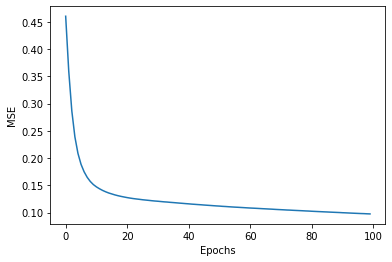

In [ ]:
ann_mnist = NeuralNetwork(trainX, trainY, (784, 64, 10))
ann_mnist.train(epoch=100, eta=0.1)

In [ ]:
# Do a feedforward pass using the trained weights and biases on the test data
output = ann_mnist.predict(testX)

correctCount = 0
for i in range(testY.shape[0]):
  # finds where the most likely item is and compares it with test data
  if np.argmax(output[i,:]) == np.argmax(testY[i,:]):
    correctCount += 1

print('Correctly classified {} % of test items'.format(correctCount/100))

Correctly classified 31.68 % of test items


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


We only achieved 31.68%, which means the network didn't learn well. 
Let's experiment with the eta a few more times. But before that, it's better to write a function that can measure the accuracy of the network and print it for us.


In [ ]:
def measure_accuracy(prediction, expected):
  correctCount = 0
  for i in range(expected.shape[0]):
    # finds where the most likely item is and compares it with test data
    if np.argmax(prediction[i,:]) == np.argmax(expected[i,:]):
      correctCount += 1
  print('Correctly classified {} % of test items'.format(correctCount/100))

**More hidden layers**

We know that each data of the MNIST data set has 784 features, and there are 60000 data. That's mean we will need a long waiting time for training the network if we try to add more hidden layers. 

**Dimensionality reduction**


To reduce the training time, we can use dimensionality reduction to reduce the size of each image from 784 to 256 or 128, while maintain the distictive features across these images. In other word, we only get rid of some non-interesting data of the image when using PCA.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=256)
pca.fit(trainX)
new_x_train = pca.transform(trainX)
new_x_test  = pca.transform(testX)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Epoch 0 cost:  0.49192300229682207
Epoch 10 cost:  0.21026933524150934
Epoch 20 cost:  0.1543460048918888
Epoch 30 cost:  0.13751481088118095
Epoch 40 cost:  0.12928126080846344
Epoch 50 cost:  0.12385571108658165
Epoch 60 cost:  0.11980245466065205
Epoch 70 cost:  0.11642813902141139
Epoch 80 cost:  0.1134389937300722
Epoch 90 cost:  0.1107467455659227


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Correctly classified 28.87 % of test items


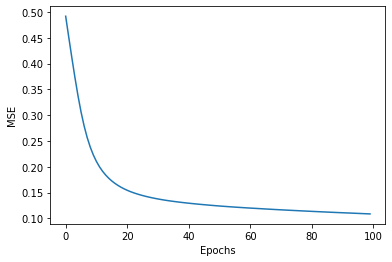

In [ ]:
ann_mnist = NeuralNetwork(new_x_train, trainY, (256, 64, 10))
ann_mnist.train(epoch=100, eta=0.1)
prediction = ann_mnist.predict(new_x_test)
measure_accuracy(prediction, testY)

We can see that, with less training time with PCA, we still get the result close to what we get when training on the original data. This works because PCA reduces the non-essential features of all the images to compress them.

**Choosing the number of nodes for hidden layers** \\
Now, with less training time, we can add more hidden layers to let the training smoothly go from 256 to 10. Here
I choose some multiples of 2 as the number of nodes for 3 hidden layers. My
structure will be (256, 128, 64, 32, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Epoch 0 cost:  0.3600531869783623
Epoch 10 cost:  0.0766123406196548
Epoch 20 cost:  0.0621339852304585
Epoch 30 cost:  0.054016503975733626
Epoch 40 cost:  0.04814825995988359
Epoch 50 cost:  0.043990147508119096
Epoch 60 cost:  0.04062890359604481
Epoch 70 cost:  0.037867880369540405
Epoch 80 cost:  0.03569000712031447
Epoch 90 cost:  0.03390677600011274


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Correctly classified 83.28 % of test items


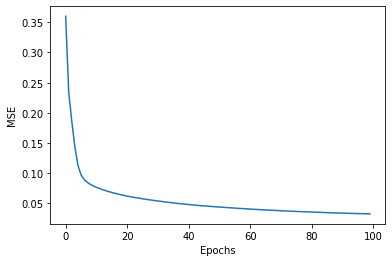

In [ ]:
ann_mnist = NeuralNetwork(new_x_train, trainY, (256, 128, 64, 32, 10))
ann_mnist.train(epoch=100, eta=0.1)
prediction = ann_mnist.predict(new_x_test)
measure_accuracy(prediction, testY)

**Adding noise**

We can try improve the network by adding some noise

In [ ]:
def generate_noise(X, y):
    """
       Double the size of the input array to create half noise, half normal data
    """
    #Add noise
    noise   = np.random.randn(len(X), 1)
    X_noise = X + noise
    #Add more data
    X = np.vstack([X, X_noise])
    y = np.vstack([y, y])

    indicies = np.random.permutation(len(X))
    X = X[indicies]
    y = y[indicies]

    return X, y

noise_x_train, noise_y_train = generate_noise(new_x_train, trainY)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Epoch 0 cost:  0.3600761941119927
Epoch 10 cost:  0.07632485648104823
Epoch 20 cost:  0.06219310091920567
Epoch 30 cost:  0.05403800912456513
Epoch 40 cost:  0.048249900287861795
Epoch 50 cost:  0.04402532641267802
Epoch 60 cost:  0.04062392298859945
Epoch 70 cost:  0.03799589216189276
Epoch 80 cost:  0.035839967621945995
Epoch 90 cost:  0.034066971217255104


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Correctly classified 82.55 % of test items


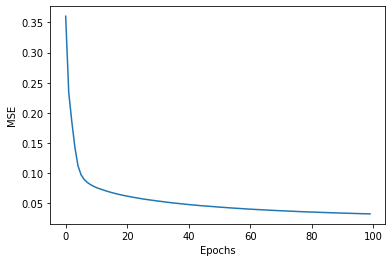

In [ ]:
ann_mnist = NeuralNetwork(noise_x_train, noise_y_train, (256, 128, 64, 32, 10))
ann_mnist.train(epoch=100, eta=0.1)
prediction = ann_mnist.predict(new_x_test)
measure_accuracy(prediction, testY)

It's actually perform a little worse when we generate some noise.

***Changing $\eta$ while learning***

We can do better by slowly reduce the eta while we train. To achieve this, we will use the parameter "factor" of our train method, which will decrease the learning rate by this formula

$$\eta_{epoch} = \eta_{initial}\times {factor}^{epoch}$$

For example if the initial eta $\eta$ is 0.999, the factor is 0.999, the epoch is 1000, so the $\eta$ at epoch 1000 is $0.999 \times 0.999^{1000} \approx 0.367$. We can try some big eta at the start, and decrease the eta in later epochs.

Let's do our final training of 1000 epochs. I also want to decrease the learning rate at the epoch 1000 to about 0.4, so I set the factor equal to 0.9991
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Epoch 0 cost:  0.3598459984410147
Epoch 10 cost:  0.0420615505788547
Epoch 20 cost:  0.028867979166606505
Epoch 30 cost:  0.023522730763889096
Epoch 40 cost:  0.020667027622169
Epoch 50 cost:  0.0187792756459321
Epoch 60 cost:  0.017604776954853834
Epoch 70 cost:  0.01629824615914705
Epoch 80 cost:  0.015485482545649656
Epoch 90 cost:  0.014757045893819386
Epoch 100 cost:  0.014107286532618394
Epoch 110 cost:  0.013736518058205995
Epoch 120 cost:  0.013274005433822485
Epoch 130 cost:  0.012937829976296798
Epoch 140 cost:  0.012564296120379827
Epoch 150 cost:  0.012303647966159181
Epoch 160 cost:  0.011881357518166717
Epoch 170 cost:  0.01171241842909931
Epoch 180 cost:  0.011437383694164084
Epoch 190 cost:  0.011180636741135362
Epoch 200 cost:  0.010910652081934489
Epoch 210 cost:  0.010756832800728476
Epoch 220 cost:  0.01063979374198743
Epoch 230 cost:  0.010369658074807477
Epoch 240 cost:  0.010214275728961567
Epoch 250 cost:  0.010039636675876576
Epoch 260 cost:  0.0098763467514187

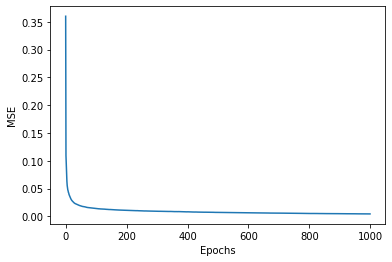

In [ ]:
ann_mnist = NeuralNetwork(new_x_train, trainY, (256, 128, 64, 32, 10))
ann_mnist.train(epoch=1000, eta=0.999, factor=0.9991)

In [ ]:
prediction = ann_mnist.predict(new_x_test)
measure_accuracy(prediction, testY)

Correctly classified 94.75 % of test items


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Finally we achieved 94.75 % accuracy for this dataset. We still have a lot to improve on. We will revisit this MNIST dataset again in future tutorials with more interesting techniques. 